In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year = 2018
names = ['Date', 'TempAvg', 'TempMin', 'TempMax', 'Rain', 'Snow', 'WindDir', 'WindSpeed', 'WindSpeedMax', 'Pressure', 'Sunshine']

In [209]:
def analize(df):
  print(df.head())
  print(df.describe())
  print(df.head(10))
  print(df.dtypes)
  print(df.shape)

def cleanup(df):
  print(df.isna().sum())
  
  df.dropna(thresh=int(len(df) * 0.2), axis=1, inplace=True)
  
  print(df.isna().sum())
  print(df.shape)

  df_NoNaN = df.dropna(how='any')

  print(df_NoNaN.isna().sum())
  print(df_NoNaN.shape)

  return df_NoNaN

def plot_NoNaN(df_NoNaN):
  plt.figure(figsize=(10, 6))
  plt.title(f'Temperature in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df_NoNaN, x='Date', y='TempAvg', label='TempAvg')
  sns.lineplot(data=df_NoNaN, x='Date', y='TempMin', label='TempMin')
  sns.lineplot(data=df_NoNaN, x='Date', y='TempMax', label='TempMax')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.title(f'Pressure in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df_NoNaN, x='Date', y='Pressure')
  plt.show()
  
  plt.figure(figsize=(10, 6))
  plt.title(f'Wind Speed in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df_NoNaN, x='Date', y='WindSpeed', label='Wind Speed')
  sns.lineplot(data=df_NoNaN, x='Date', y='WindSpeedMax', label='Max Wind Speed')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.title(f'Rain in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df_NoNaN, x='Date', y='Rain')
  plt.show()

  plt.figure(figsize=(8, 8))
  plt.title(f'Wind Direction in {year}')
  sns.histplot(data=df_NoNaN, x='WindDir', stat='count', bins=16, multiple='stack')
  plt.xticks(np.arange(0, 360, 22.5), labels=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])
  plt.show()

def interpolate(df):
  def interpolate_column(df, column_name):
    col = df[column_name].values  # Użyj .values, aby uzyskać wartości jako numpy array
    n = len(col)
    # Zidentyfikowanie NaN w kolumnie
    nan_indices = np.where(np.isnan(col))[0]
    if len(nan_indices) == 0:
        return col

    # Przejście przez wszystkie NaN i interpolowanie wartości
    for nan_index in nan_indices:
        # Znalezienie poprzednich i następnych wartości
        prev_index = nan_index - 1
        next_index = nan_index + 1

        # Szukanie poprzedniej nie-NaN wartości
        while prev_index >= 0 and np.isnan(col[prev_index]):
            prev_index -= 1

        # Szukanie następnej nie-NaN wartości
        while next_index < n and np.isnan(col[next_index]):
            next_index += 1

        # Interpolacja liniowa
        if prev_index >= 0 and next_index < n:
            col[nan_index] = col[prev_index] + (col[next_index] - col[prev_index]) * (nan_index - prev_index) / (next_index - prev_index)
        elif prev_index >= 0:
            col[nan_index] = col[prev_index]
        elif next_index < n:
            col[nan_index] = col[next_index]

    return col

  # Zastosowanie funkcji do wszystkich kolumn zawierających NaN
  for column in df.columns:
      if df[column].isna().sum() > 0:
          df[column] = interpolate_column(df, column)

  print(df.isna().sum())

def plot(df, df_NoNaN, df_WithNaN):
  plt.figure(figsize=(10, 6))
  plt.title(f'Temperature in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df, x='Date', y='TempAvg', label='TempAvg')
  sns.lineplot(data=df, x='Date', y='TempMin', label='TempMin')
  sns.lineplot(data=df, x='Date', y='TempMax', label='TempMax')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.title(f'Wind Speed in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df, x='Date', y='WindSpeed', label='Wind Speed')
  sns.lineplot(data=df, x='Date', y='WindSpeedMax', label='Max Wind Speed')
  plt.legend()
  plt.show()

  _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

  # Plot for df_NoNaN
  ax1.set_title(f'Wind Direction in {year} (df_NoNaN)')
  sns.histplot(data=df_NoNaN, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax1)
  ax1.set_xticks(np.arange(0, 360, 22.5))
  ax1.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  # Plot for df
  ax2.set_title(f'Wind Direction in {year} (df)')
  sns.histplot(data=df, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax2)
  ax2.set_xticks(np.arange(0, 360, 22.5))
  ax2.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  # Plot for df_withNaN
  ax3.set_title(f'Wind Direction in {year} (df_withNaN)')
  sns.histplot(data=df_WithNaN, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax3)
  ax3.set_xticks(np.arange(0, 360, 22.5))
  ax3.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  plt.show()

In [210]:
def read_csv(filename, city_name):
  df = pd.read_csv(filename, delimiter=',', names=names, skiprows=1)  # skipping header row
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[df['Date'].dt.year == year]
  df['city'] = city_name
  return df

            Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
15969 2018-01-01      2.9     -0.8      6.3   0.0   NaN    249.0        5.9   
15970 2018-01-02      1.1     -4.6      4.7   0.0   NaN    283.0        8.5   
15971 2018-01-03      2.3     -3.0      5.6   0.0   NaN    206.0       12.8   
15972 2018-01-04      4.4      0.6      7.4   3.3   NaN    219.0       14.7   
15973 2018-01-05      4.8      0.2      9.4   0.0   NaN    249.0        8.4   

       WindSpeedMax  Pressure  Sunshine    city  
15969           NaN    1008.5       NaN  Krakow  
15970           NaN    1009.5       NaN  Krakow  
15971           NaN    1002.9       NaN  Krakow  
15972           NaN    1001.4       NaN  Krakow  
15973           NaN    1002.7       NaN  Krakow  
                      Date     TempAvg     TempMin     TempMax        Rain  \
count                  365  365.000000  365.000000  365.000000  363.000000   
mean   2018-07-02 00:00:00   10.105753    5.406575   15.236438    1.5

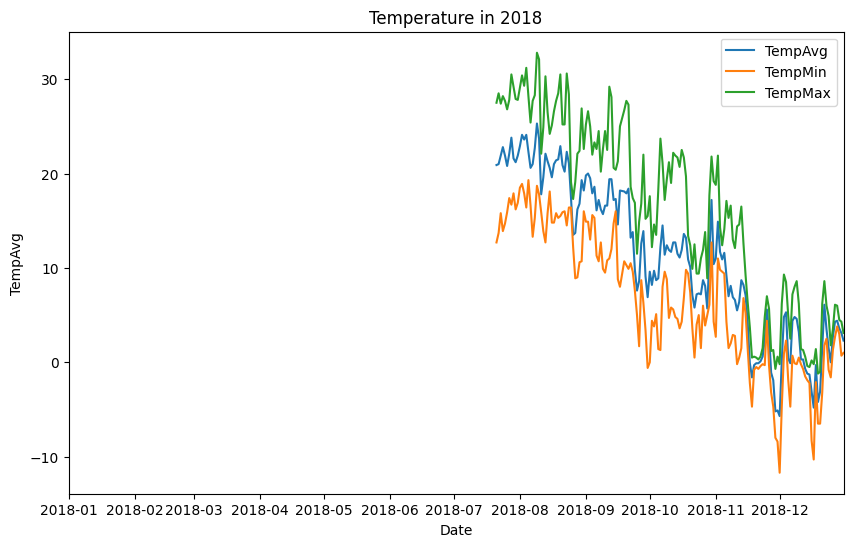

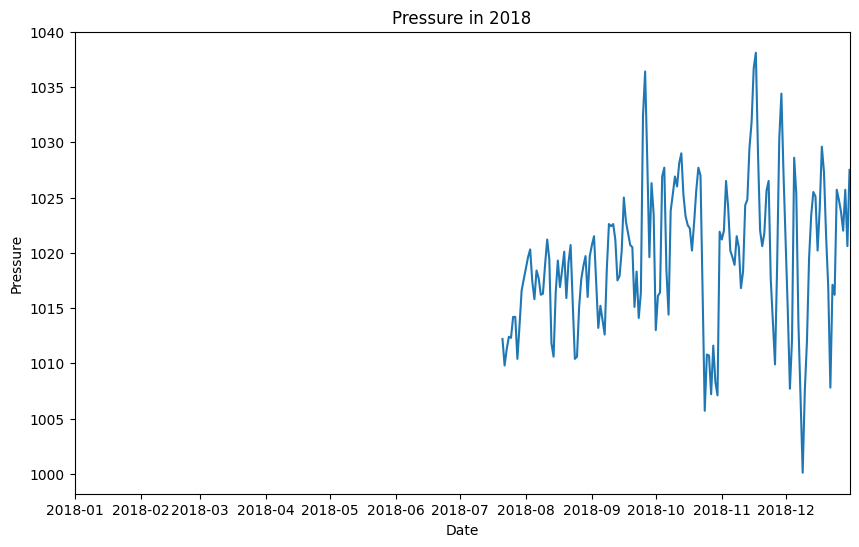

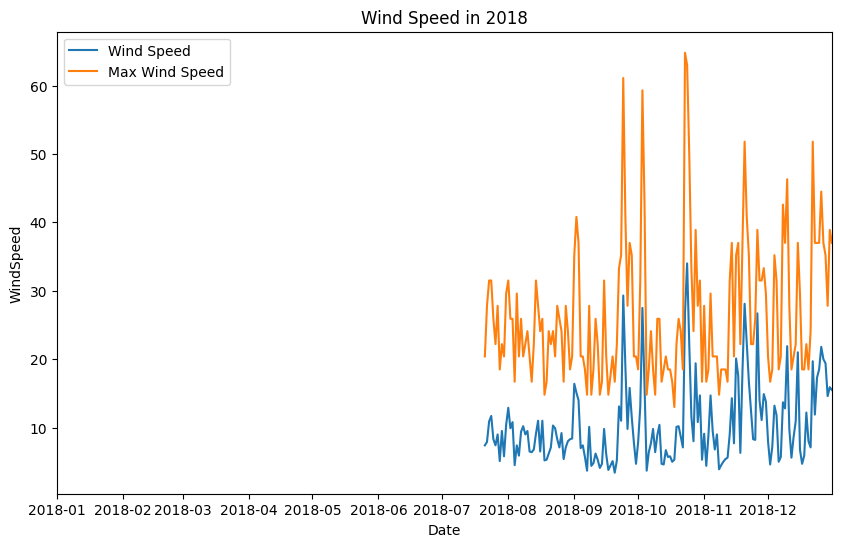

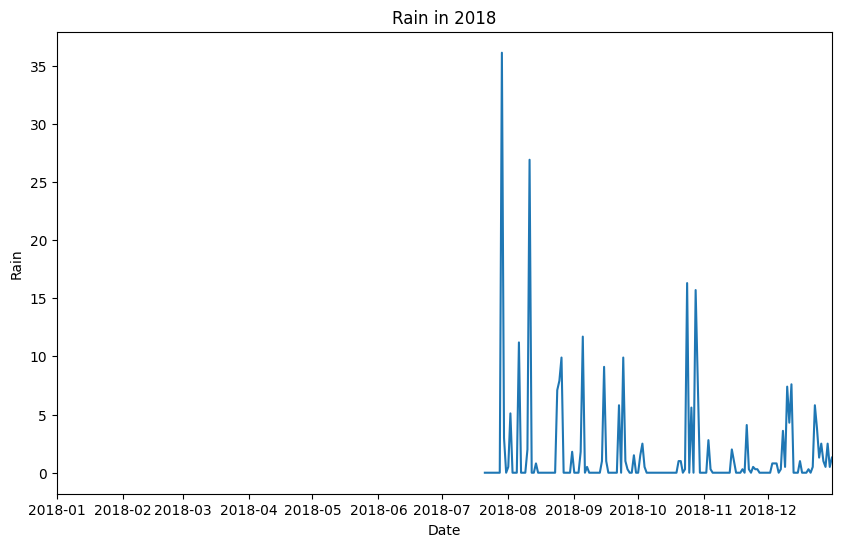

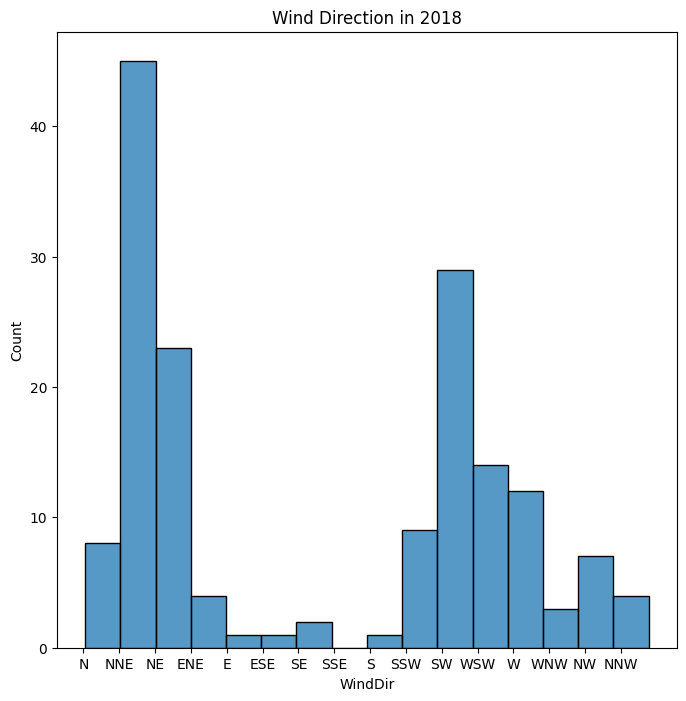

Date            0
TempAvg         0
TempMin         0
TempMax         0
Rain            0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
city            0
dtype: int64


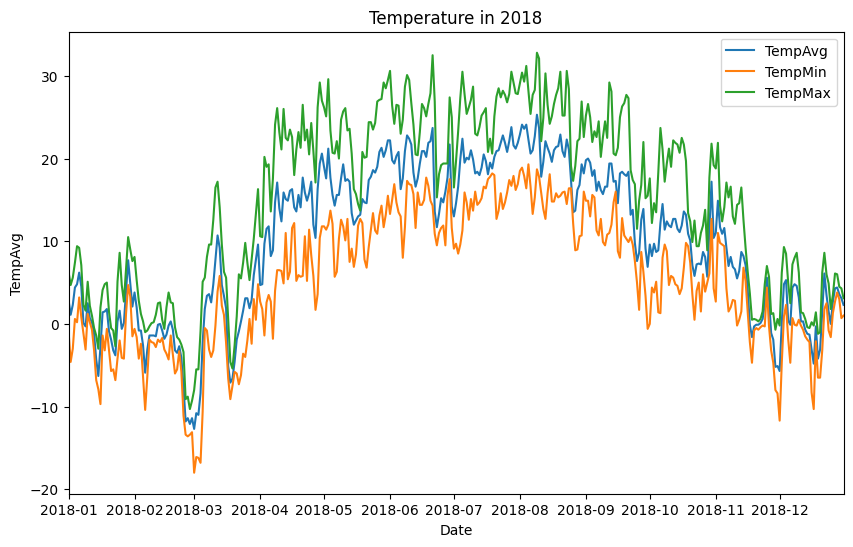

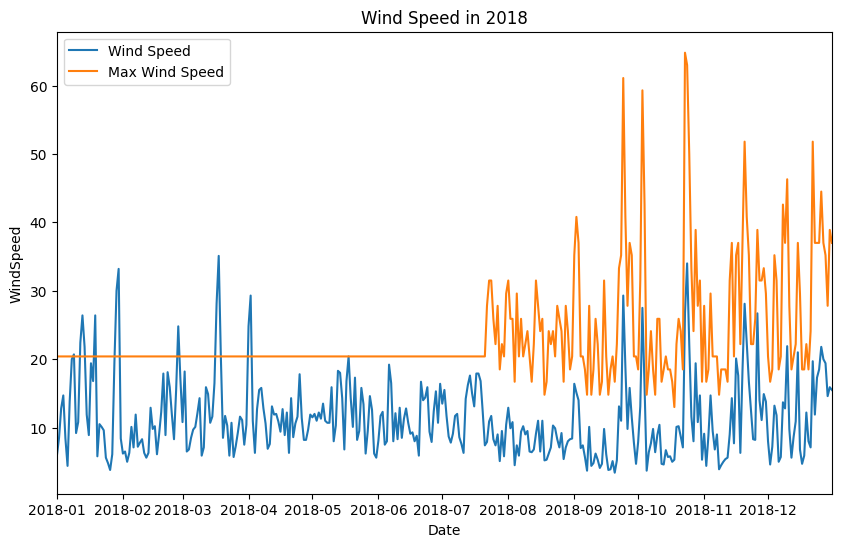

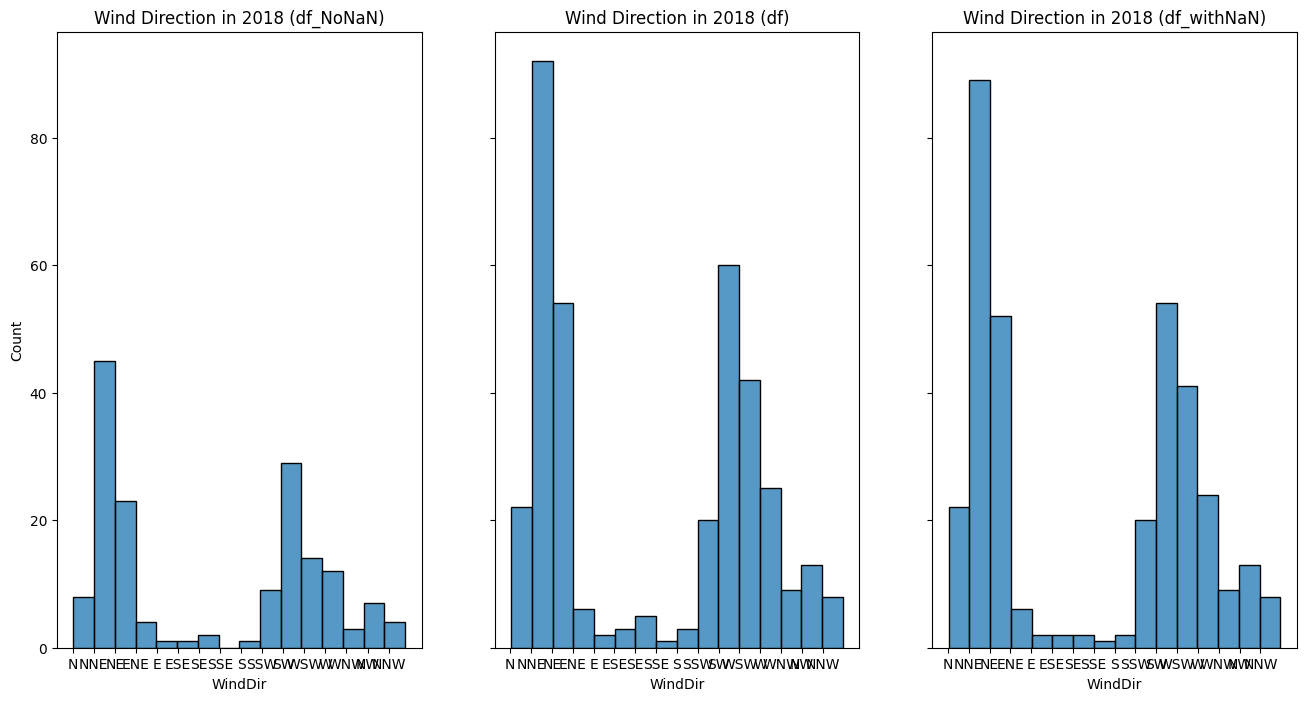

In [211]:


# Load the data for multiple cities
df_Krakow = read_csv('Krakow.csv',    'Krakow')
df_Warsaw = read_csv('Warszawa.csv',  'Warszawa')
df_Szczec = read_csv('Szczecin.csv',  'Szczecin')
df_Gdansk = read_csv('Gdansk.csv',    'Gdansk')
df_Podlas = read_csv('Bialystok.csv', 'Bialystok')
df_Malmo = read_csv('Malmo.csv', 'Malmo')
df_Monachium = read_csv('Monachium.csv', 'Monachium')
df_Czerniowce = read_csv('Czerniowce.csv', 'Czerniowce')
df_Ryga = read_csv('Ryga.csv', 'Ryga')

city_coords = {
  'Krakow':    (19.94, 50.06),
  'Warszawa':  (21.01, 52.23),
  'Szczecin':  (14.55, 53.43),
  'Gdansk':    (18.65, 54.35),
  'Bialystok': (23.16, 53.13),
  'Malmo':     (13.00, 55.61),
  'Monachium': (11.58, 48.14),
  'Czerniowce':(25.94, 48.29),
  'Ryga':      (24.10, 56.95),
}

def run(df):
  df_WithNaN = pd.DataFrame(df)
  analize(df)
  df_NoNaN = cleanup(df)
  plot_NoNaN(df_NoNaN)
  interpolate(df)
  plot(df, df_NoNaN, df_WithNaN)

run(df_Krakow)



In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from ipywidgets import interact, widgets

# Concatenate all data into a single DataFrame
data = pd.concat([df_Krakow, df_Warsaw, df_Szczec, df_Gdansk, df_Podlas, df_Malmo, df_Monachium, df_Czerniowce, df_Ryga])

data['lon'] = data['city'].map(lambda city: city_coords[city][0])
data['lat'] = data['city'].map(lambda city: city_coords[city][1])

# Function to create a map for the selected date
def plot_temperature(date):
    df = data[data['Date'] == pd.Timestamp(date)]
    
    if df.empty:
        print(f"No data available for {date}")
        return
    
    # Generate a grid for interpolation
    grid_lon, grid_lat = np.mgrid[14:25:10j, 49:55:10j]
    
    # Interpolate the data onto the grid
    grid_temp = griddata((df['lon'], df['lat']), df['TempAvg'], (grid_lon, grid_lat), fill_value=0, method='cubic')
    
    # Create the map
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([14, 25, 49, 55], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    
    # Plot contours with fixed color bar limits and gradient colors
    contour = ax.contourf(grid_lon, grid_lat, grid_temp, 60, transform=ccrs.PlateCarree(), cmap='coolwarm')
    plt.colorbar(contour, ax=ax, orientation='vertical', label='Temperature (°C)')
    
    for cityName in list(city_coords.keys())[:5]:
        ax.text(city_coords[cityName][0], city_coords[cityName][1], cityName, transform=ccrs.PlateCarree(), fontsize=12, verticalalignment='center', color='black', zorder=6)
    
    
    # Add title
    plt.title(f'Temperature Distribution in Poland on {date}')
    
    # Display the map
    plt.show()

# Create a date slider widget
date_slider = widgets.SelectionSlider(
    options=[date.strftime('%Y-%m-%d') for date in pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')],
    description='Date',
    continuous_update=False
)

# Connect the widget to the function
interact(plot_temperature, date=date_slider)

# plot_temperature(f'{year}-01-01')


interactive(children=(SelectionSlider(continuous_update=False, description='Date', options=('2018-01-01', '201…

<function __main__.plot_temperature(date)>